In [27]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = load_breast_cancer(as_frame = True)
df = data.frame

In [29]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

**PREGUNTA**

1. No dividas el dataset con train_test_split(). Calcula el accuracy de LogisticRegression(solver= 'liblinear') usando K-fold, probando Ks de 2 hasta 10 Nota: usa un for ;-)

In [30]:
X = df.drop(columns=['target'])
y = df['target']
# Realizo el modelo con solver = "Liblinear"
model = LogisticRegression(solver = "liblinear")
# For para ks de 2 hasta 10 y calculo del accuracy usando k-fold cross validation
for k in range(2, 11):
  scores = cross_val_score(model, X, y, cv=k)
  accuracy = scores.mean()
  print(f"K = {k} Accurary: {accuracy: .4f}")


K = 2 Accurary:  0.9420
K = 3 Accurary:  0.9490
K = 4 Accurary:  0.9438
K = 5 Accurary:  0.9508
K = 6 Accurary:  0.9526
K = 7 Accurary:  0.9491
K = 8 Accurary:  0.9508
K = 9 Accurary:  0.9526
K = 10 Accurary:  0.9508


**PREGUNTA**

2. Usa Stratified Kfold con 5 folds para ver el accuracy y la desviación típica que se obtiene

In [31]:
from sklearn.model_selection import StratifiedKFold
# Definir el modelo y realizo la validacion crubada para obtener los scores
skfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=skfold)

# Calculo el accuracy y la desviacion tipica
accuracy = np.mean(scores)
std_desviation = np.std(scores)

# Visualizo los datos
print(f"Accuracy: {accuracy:.4f}")
print(f"Desviacion estandar: {std_desviation:.4f}")

Accuracy: 0.9508
Desviacion estandar: 0.0162


**PREGUNTA**

3. Usa Leave One Out para ver el accuracy y la desviación típica que se obtiene

In [32]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
# Defino el modelo
leave_validation = LeaveOneOut()
scores = cross_val_score(model, X, y, cv= leave_validation)

# Calculo del Accuracy y Desv. tipica
accuracy = np.mean(scores)
std_desviation = np.std(scores)

# Visualizo los datos
print(f"Accuracy: {accuracy:.4f}")
print(f"Desviacion estandar: {std_desviation:.4f}")

Accuracy: 0.9525
Desviacion estandar: 0.2126


**PREGUNTA**

4. Reserva un 20% de los datos para realizar el test final.
5. Utiliza Exhaustive Grid Search sobre el 80% de entrenamiento para buscar los parámetros óptimos para accuracy y recall en LinearRegression. Prueba con penalty 'l2' o 'none', los valores de C [0.001, 0.01, 0.1, 1, 10, 100, 1000] y todos los solvers disponibles.
6. Calcula las métricas accuracy y recall con los datos de test y los valores óptimos calculados en el punto anterior.

In [33]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

data = load_breast_cancer(as_frame = True)
df = data.frame
X = df.drop('target', axis=1)
y = df['target']
# Separo los datos en entrenamiento y prueba y reservo el 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defino los parametros para la busqueda exhaustiva
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

scores = ['accuracy', 'recall_macro']
import sklearn
print('métricas disponibles para Grid Search')
sorted(sklearn.metrics.SCORERS.keys())

métricas disponibles para Grid Search


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [34]:
import warnings
warnings.filterwarnings('ignore')

for score in scores:
  print('Metrica a optimizar: %s' % score )
  print()

  clf = GridSearchCV(LogisticRegression(penalty= 'l2'), parameters, scoring=score)
  clf.fit(X_train, y_train)

  print("Hiperparamétros óptimos: ")
  print()
  print(clf.best_params_)
  print("Valores de la métrica: ", scores, "que han dado las distintas iteraciones")
  print()
  means = clf.cv_results_['mean_test_score']
  stds = clf.cv_results_['std_test_score']

Metrica a optimizar: accuracy

Hiperparamétros óptimos: 

{'C': 100, 'solver': 'newton-cg'}
Valores de la métrica:  ['accuracy', 'recall_macro'] que han dado las distintas iteraciones

Metrica a optimizar: recall_macro

Hiperparamétros óptimos: 

{'C': 100, 'solver': 'newton-cg'}
Valores de la métrica:  ['accuracy', 'recall_macro'] que han dado las distintas iteraciones



**PREGUNTA**

7. Plotea la curva de validación para el accuracy de los distintos solvers del ejemplo anterior. Puedes ver un ejemplo aquí para dibujar el gráfico:

> https://vitalflux.com/validation-curves-explained-python-sklearn-example/




In [35]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

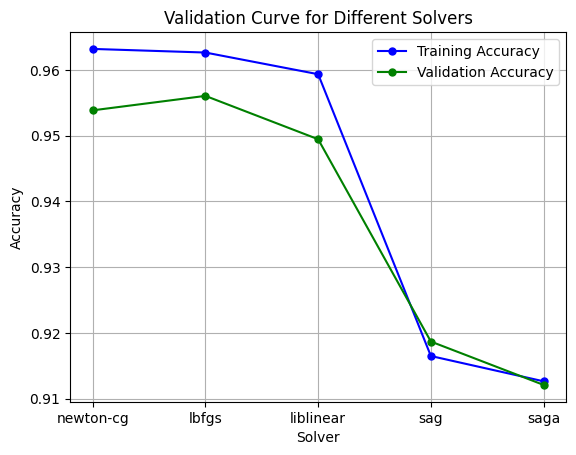

In [36]:
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline( LogisticRegression( solver = solvers , penalty = 'l2', max_iter=10000, random_state=42))

train_scores, test_scores = validation_curve(estimator=pipeline,
                                             X=X_train, y=y_train,
                                             param_name='logisticregression__solver', param_range=solvers, scoring = 'accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(solvers, train_mean,
         marker='o', markersize=5,
         color='blue', label='Training Accuracy')
plt.plot(solvers, test_mean,
         marker='o', markersize=5,
         color='green', label='Validation Accuracy')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Different Solvers')
plt.legend()
plt.grid()
plt.show()
